# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
import pandas as pd
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

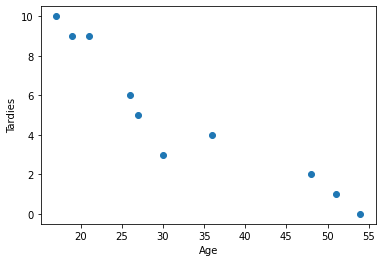

In [6]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(student_data['X'], student_data['Y'])
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# It's possible that there is some correlation between age and number of tardies, but based on this data, it's not possible to make any 
# definite conclusions.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
# Your response here.
#covariance:
covariance = student_data['X'].cov(student_data['Y'])
print("Covariance:", covariance)
# the negative value indicates that as one variable increases, the other decreases

#correlation:
correlation = student_data['X'].corr(student_data['Y'])
print("Correlation:", correlation)
# the negative value indicates that there's a strong negative linear relationship between Age and Tardies

# the results support the hypothesis that younger students are more often late to class, as they tend to have higher numbers of tardies.

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
# Your response here.
# The outcome variable will be the number of tardies. I will use a linear regression model, as I'm trying to predict a continuous variable 
# (number of tardies) based on a predictor variable (age).´

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(student_data['X'], student_data['Y'])
print("Slope: ", slope)             # the average change in the number of tardies for every unit increase in age
print("Intercept: ", intercept)     #  the average number of tardies for a student with an age of zero
print("R-value: ", r_value)         # correlation between age and number of tardies
print("P-value: ", p_value)         # the probability that the observed correlation between the two variables could have occurred by chance
print("Standard Error: ", std_err)  # how much the estimated regression line deviates from the actual values of the dependent variable 

Slope:  -0.2428207709159808
Intercept:  12.888803363135768
R-value:  -0.9391626886887121
P-value:  5.56665383455343e-05
Standard Error:  0.03139728816158607


In [22]:
#  In this case, the p-value is 5.57e-05, which is much smaller than 0.05. 
#  I can reject the null hypothesis that there is no correlation between the two variables.

Plot your regression model on your scatter plot.

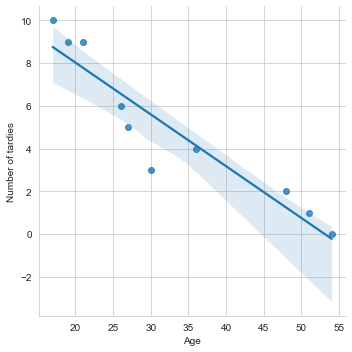

In [24]:
# Your code here.
import seaborn as sns
sns.set_style("whitegrid")

sns.lmplot(x="X", y="Y", data=student_data)

plt.xlabel("Age")
plt.ylabel("Number of tardies")

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [25]:
# Your response here. 
# The results of the regression model show that there is a negative relationship between age and tardiness. 
# This means that as the age of a student increases, the number of tardies decreases. 
# This is indicated by the negative slope of the regression line (-0.2428). 
# This is a strong indication that age is a good predictor of tardiness.

# Also, the p-value of the model is very small, which suggests that the relationship between age and tardiness is statistically significant 
# and not likely to have occurred by chance.

# Based on these results, we can say that age is a good predictor of tardiness and that as the age of a student increases, the number of tardies 
# decreases.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [28]:
# Import any libraries you may need & the data
cars = pd.read_csv('vehicles.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
# Your response here. 
cols = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
cars = cars[cols]

correlations = cars.corr()
print(correlations)

# "Fuel Barrels/Year" and "Cylinders" are the two most important variables in determining CO2 emissions. 
# Both of these variables have a high positive correlation

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [33]:
# Your response here. 
# I will use multiple linear regression for this, as there are a lot of predictors variables being used to predict the outcome variable (C02 Emission)

import statsmodels.api as sm

X = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = cars['CO2 Emission Grams/Mile']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                             11:51:33   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [35]:
# The results of the regression analysis show that the model has a high R-squared value of 0.981, which means that 98.1% of the variation in the 
# CO2 Emission Grams/Mile is explained by the independent variables in the model. 
# The p-values for each variable are also provided, and all of them have 0.00000, meaning  all the predictor variables in the model are 
# highly significant in determining the CO2 emissions.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [37]:
# Your response here. 
# The OLS Regression Results show that the model has a high R-squared value of 0.981, meaning that 98.1% of the variation in the dependent variable
# "CO2 Emission Grams/Mile" can be explained by the independent variables in the model.

# The coefficients for each independent variable show the relationship between that variable and the dependent variable. 
# The most important variables in the model are the "Combined MPG" and "Fuel Barrels/Year" variables, as they have the largest negative and 
# positive coefficients, respectively, and the smallest p-values, indicating that they are statistically significant in explaining the variation
# in CO2 Emissions.

# The negative coefficient for "Combined MPG" means that as the "Combined MPG" increases, the "CO2 Emission Grams/Mile" decreases, and the positive 
# coefficient for "Fuel Barrels/Year" means that as the "Fuel Barrels/Year" increases, the "CO2 Emission Grams/Mile" also increases.

# We can have confidence in these conclusions as the p-values for all the variables are close to 0, indicating that they are statistically 
# significant.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [38]:
# Your code here.
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}
df = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

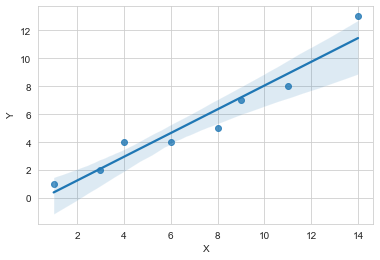

In [40]:
# Your code here.
sns.regplot(x='X', y='Y', data=df)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
# The scatter plot appears to show a positive relationship between the number of people invited (X) and the number of people who attend (Y). 
# This means that as the number of people invited increases, the number of people who attend also increases.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

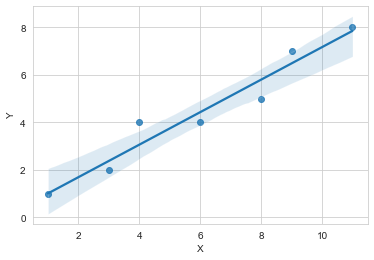

In [42]:
# Your response here. 
no_outties = {'X': [1, 3, 4, 6, 8, 9, 11],
        'Y': [1, 2, 4, 4, 5, 7, 8]}
df = pd.DataFrame(no_outties)

sns.regplot(x='X', y='Y', data=df)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [44]:
# Your response here. 
# In conclusion, removing the problematic point improved the linearity of the relationship between X and Y, making the regression model a 
# better fit for the data.